### build the random forest model after normalizing the variable to house pricing from boston data set.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV 
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets

In [19]:
boston = datasets.load_boston()
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [20]:
#viewing the statistical sumarry of the features
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
#viewing the data types of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


they are all float types and no categorical variable

In [22]:
#checking for missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There are no null values

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

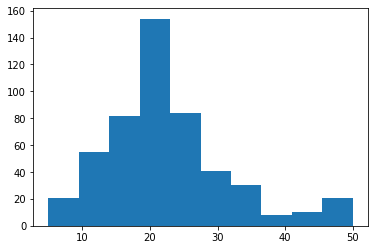

In [23]:
plt.hist(df['MEDV'])

In [24]:
# geneerating the corellation values
cor = df.corr()

<AxesSubplot:>

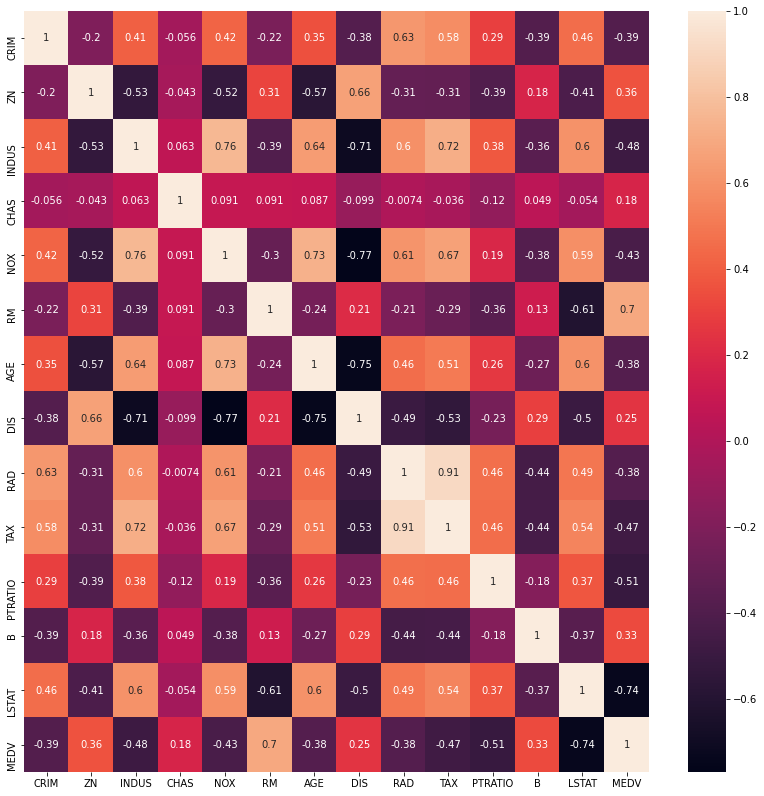

In [25]:
#plotting a heat map to plot the corelation for better viewing and identification of corelllation
plt.figure(figsize=(14, 14))
sns.heatmap(cor,annot = True)

we see a high correlation of outtarget with LSTAT,PTRATIO,TAX,RM,NOX,INDUS

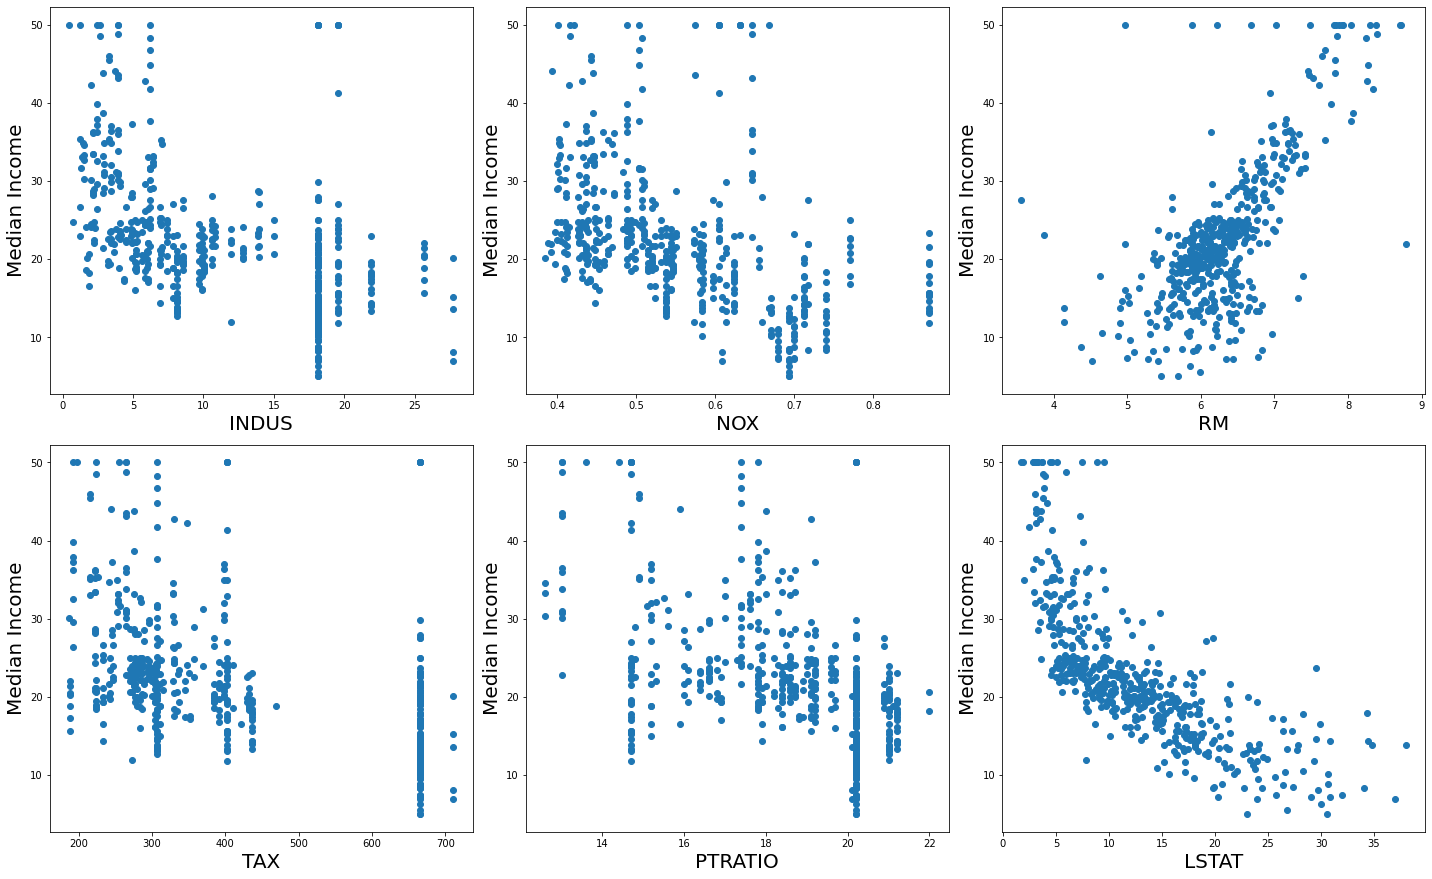

In [36]:
#plotting the scatter plot
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1
col =['INDUS','NOX','RM','TAX','PTRATIO','LSTAT']
for column in col:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(df[column],df['MEDV'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Median Income',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [33]:
X = df[['INDUS','NOX','RM','TAX','PTRATIO','LSTAT']]
y =  df.MEDV

In [34]:
X.head()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
0,2.31,0.538,6.575,296.0,15.3,4.98
1,7.07,0.469,6.421,242.0,17.8,9.14
2,7.07,0.469,7.185,242.0,17.8,4.03
3,2.18,0.458,6.998,222.0,18.7,2.94
4,2.18,0.458,7.147,222.0,18.7,5.33


In [57]:
#checking for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,3.247388,INDUS
1,3.004119,NOX
2,1.702434,RM
3,2.600211,TAX
4,1.491134,PTRATIO
5,2.418666,LSTAT


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


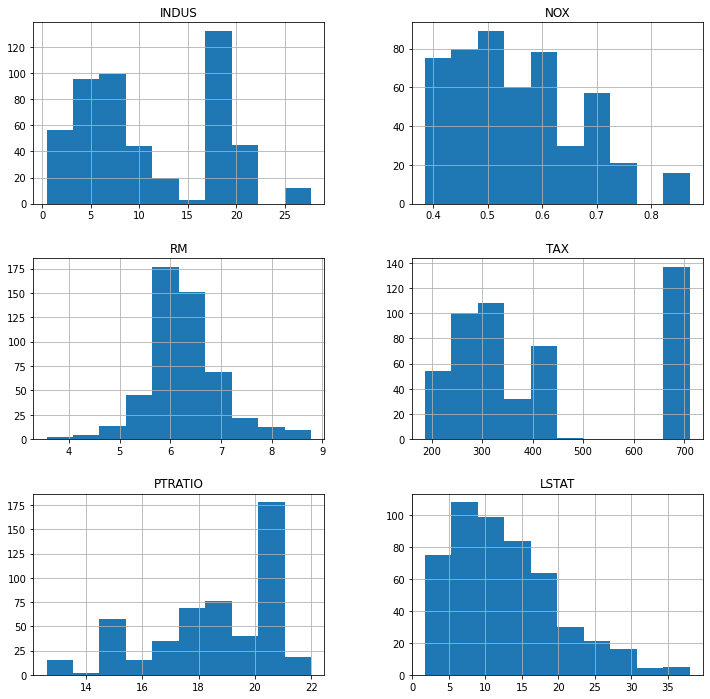

In [37]:
#viewing the state of the data available
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
X.hist(ax=ax)
plt.show()

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.30, random_state= 355)

In [42]:
rand_clf = RandomForestRegressor(random_state=6)


In [43]:
rand_clf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=6, verbose=0, warm_start=False)

In [44]:
rand_clf.score(X_test,y_test)

0.8740533397586229

In [45]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
     "n_estimators" : [90,100,115],
    'criterion': ['mse', 'mae'],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2','sqrt']
    }

In [46]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [47]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
[CV] criterion=mse, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=90 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=mse, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=90, score=0.828, total=   0.7s
[CV] criterion=mse, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=90 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  criterion=mse, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=90, score=0.902, total=   0.5s
[CV] criterion=mse, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=90 


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV]  criterion=mse, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=90, score=0.827, total=   0.6s
[CV] criterion=mse, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=90 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=90, score=0.819, total=   0.4s
[CV] criterion=mse, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=90 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=90, score=0.573, total=   0.4s
[CV] criterion=mse, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.828, total=   0.5s
[CV] criterion=mse, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.90

[CV]  criterion=mse, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, score=0.586, total=   0.4s
[CV] criterion=mse, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=115 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=115, score=0.813, total=   0.5s
[CV] criterion=mse, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=115 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=115, score=0.902, total=   0.5s
[CV] criterion=mse, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=115 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=115, score=0.825, total=   0.5s
[CV] criterion=mse, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=115 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=115, score

[CV]  criterion=mse, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90, score=0.899, total=   0.4s
[CV] criterion=mse, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90, score=0.823, total=   0.4s
[CV] criterion=mse, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90, score=0.825, total=   0.4s
[CV] criterion=mse, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90, score=0.651, total=   0.4s
[CV] criterion=mse, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.817,

[CV]  criterion=mse, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, score=0.832, total=   0.5s
[CV] criterion=mse, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, score=0.645, total=   0.5s
[CV] criterion=mse, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115, score=0.808, total=   0.5s
[CV] criterion=mse, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115, score=0.899, total=   0.5s
[CV] criterion=mse, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115, score

[CV]  criterion=mse, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=90, score=0.800, total=   0.4s
[CV] criterion=mse, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=90 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=90, score=0.887, total=   0.4s
[CV] criterion=mse, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=90 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=90, score=0.818, total=   0.4s
[CV] criterion=mse, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=90 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=90, score=0.829, total=   0.4s
[CV] criterion=mse, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=90 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=90, score=0.676, t

[CV]  criterion=mse, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=100, score=0.815, total=   0.4s
[CV] criterion=mse, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=100 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=100, score=0.829, total=   0.4s
[CV] criterion=mse, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=100 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=100, score=0.674, total=   0.4s
[CV] criterion=mse, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=115 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=115, score=0.796, total=   0.5s
[CV] criterion=mse, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=115 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=115, score

[CV]  criterion=mse, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=115, score=0.677, total=   0.5s
[CV] criterion=mse, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90, score=0.792, total=   0.5s
[CV] criterion=mse, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90, score=0.885, total=   0.3s
[CV] criterion=mse, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90, score=0.812, total=   0.4s
[CV] criterion=mse, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90, score=0.821, 

[CV]  criterion=mse, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, score=0.884, total=   0.4s
[CV] criterion=mse, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, score=0.810, total=   0.4s
[CV] criterion=mse, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, score=0.822, total=   0.4s
[CV] criterion=mse, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, score=0.697, total=   0.4s
[CV] criterion=mse, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115, score

[CV]  criterion=mse, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115, score=0.819, total=   0.5s
[CV] criterion=mse, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115, score=0.697, total=   0.5s
[CV] criterion=mse, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=90 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=90, score=0.782, total=   0.4s
[CV] criterion=mse, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=90 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=90, score=0.883, total=   0.4s
[CV] criterion=mse, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=90 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=90, score=0.805

[CV]  criterion=mse, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=100, score=0.783, total=   0.4s
[CV] criterion=mse, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=100 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=100, score=0.883, total=   0.4s
[CV] criterion=mse, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=100 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=100, score=0.803, total=   0.4s
[CV] criterion=mse, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=100 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=100, score=0.815, total=   0.4s
[CV] criterion=mse, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=100 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=100, score

[CV]  criterion=mse, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=115, score=0.806, total=   0.5s
[CV] criterion=mse, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=115 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=115, score=0.812, total=   0.4s
[CV] criterion=mse, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=115 
[CV]  criterion=mse, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=115, score=0.708, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=90 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=90, score=0.810, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=90 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=90, score=0.9

[CV]  criterion=mse, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=90, score=0.839, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100, score=0.811, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100, score=0.906, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100, score=0.816, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100, score=

[CV]  criterion=mse, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=115, score=0.905, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=115 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=115, score=0.815, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=115 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=115, score=0.832, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=115 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=115, score=0.829, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=90 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=90, score=0

[CV]  criterion=mse, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=90, score=0.831, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=90 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=90, score=0.832, total=   0.3s
[CV] criterion=mse, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100, score=0.792, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100, score=0.905, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100, score=0.

[CV]  criterion=mse, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115, score=0.783, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115, score=0.902, total=   0.5s
[CV] criterion=mse, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115, score=0.811, total=   0.5s
[CV] criterion=mse, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115, score=0.828, total=   0.5s
[CV] criterion=mse, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115, score

[CV]  criterion=mse, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=90, score=0.827, total=   0.5s
[CV] criterion=mse, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=90 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=90, score=0.826, total=   0.3s
[CV] criterion=mse, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=90 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=90, score=0.832, total=   0.3s
[CV] criterion=mse, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=100 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=100, score=0.773, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=100 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=100, score=0.89

[CV]  criterion=mse, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, score=0.829, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=115 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=115, score=0.765, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=115 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=115, score=0.896, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=115 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=115, score=0.814, total=   0.6s
[CV] criterion=mse, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=115 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=115, score

[CV]  criterion=mse, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=90, score=0.894, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=90 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=90, score=0.800, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=90 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=90, score=0.807, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=90 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=90, score=0.831, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=100, score=0.757,

[CV]  criterion=mse, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.809, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.832, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115, score=0.754, total=   0.5s
[CV] criterion=mse, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115, score=0.893, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115, score

[CV]  criterion=mse, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=90, score=0.749, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=90 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=90, score=0.892, total=   0.3s
[CV] criterion=mse, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=90 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=90, score=0.792, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=90 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=90, score=0.795, total=   0.3s
[CV] criterion=mse, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=90 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=90, score=0.824, t

[CV]  criterion=mse, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, score=0.792, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, score=0.798, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, score=0.824, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=115 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=115, score=0.745, total=   0.4s
[CV] criterion=mse, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=115 
[CV]  criterion=mse, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=115, score

[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=115, score=0.831, total=   0.4s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=90 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=90, score=0.812, total=   0.3s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=90 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=90, score=0.908, total=   0.3s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=90 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=90, score=0.817, total=   0.3s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=90 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=90, score=0.842, 

[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.903, total=   0.4s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.810, total=   0.4s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.834, total=   0.4s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.830, total=   0.4s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=115 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=115, score

[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=115, score=0.841, total=   0.6s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=115 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=115, score=0.843, total=   0.5s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=90 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=90, score=0.799, total=   0.6s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=90 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=90, score=0.905, total=   0.5s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=90 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=90, score=0.814

[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.783, total=   0.6s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.902, total=   0.4s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.808, total=   0.4s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.833, total=   0.4s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score

[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=115, score=0.823, total=   0.7s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=115 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=115, score=0.829, total=   0.7s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=115 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=115, score=0.828, total=   0.5s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=90 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=90, score=0.777, total=   0.4s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=90 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=90, score=0.9

[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=90, score=0.830, total=   0.8s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100, score=0.769, total=   0.6s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100, score=0.896, total=   0.4s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100, score=0.812, total=   0.4s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100, score=

[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=115, score=0.893, total=   0.4s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=115 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=115, score=0.802, total=   0.4s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=115 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=115, score=0.804, total=   0.4s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=115 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=115, score=0.836, total=   0.6s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=90 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=90, score=0

[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=90, score=0.807, total=   0.3s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=90 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=90, score=0.831, total=   0.3s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.757, total=   0.4s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.892, total=   0.4s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.

[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=115, score=0.745, total=   0.4s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=115 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=115, score=0.892, total=   0.4s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=115 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=115, score=0.791, total=   0.4s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=115 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=115, score=0.797, total=   0.4s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=115 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=115, score

[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=90, score=0.792, total=   0.4s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=90 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=90, score=0.795, total=   0.3s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=90 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=90, score=0.824, total=   0.3s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100, score=0.750, total=   0.4s
[CV] criterion=mse, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  criterion=mse, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100, score=0.89

[CV]  criterion=mae, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.639, total=   1.0s
[CV] criterion=mae, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=115 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=115, score=0.804, total=   1.2s
[CV] criterion=mae, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=115 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=115, score=0.904, total=   1.1s
[CV] criterion=mae, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=115 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=115, score=0.828, total=   1.1s
[CV] criterion=mae, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=115 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=115, score

[CV]  criterion=mae, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90, score=0.900, total=   0.9s
[CV] criterion=mae, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90, score=0.822, total=   0.9s
[CV] criterion=mae, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90, score=0.789, total=   0.8s
[CV] criterion=mae, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90, score=0.624, total=   0.8s
[CV] criterion=mae, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.805,

[CV]  criterion=mae, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.781, total=   0.9s
[CV] criterion=mae, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.683, total=   0.9s
[CV] criterion=mae, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=115 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=115, score=0.778, total=   1.0s
[CV] criterion=mae, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=115 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=115, score=0.901, total=   1.1s
[CV] criterion=mae, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=115 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=115, score

[CV]  criterion=mae, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90, score=0.779, total=   0.8s
[CV] criterion=mae, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90, score=0.900, total=   0.8s
[CV] criterion=mae, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90, score=0.809, total=   0.8s
[CV] criterion=mae, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90, score=0.777, total=   0.8s
[CV] criterion=mae, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90, score=0.686, t

[CV]  criterion=mae, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.803, total=   0.8s
[CV] criterion=mae, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.790, total=   0.8s
[CV] criterion=mae, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.714, total=   0.8s
[CV] criterion=mae, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=115 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=115, score=0.761, total=   1.0s
[CV] criterion=mae, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=115 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=115, score

[CV]  criterion=mae, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=115, score=0.712, total=   1.0s
[CV] criterion=mae, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=90 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=90, score=0.758, total=   0.7s
[CV] criterion=mae, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=90 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=90, score=0.896, total=   0.7s
[CV] criterion=mae, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=90 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=90, score=0.802, total=   0.7s
[CV] criterion=mae, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=90 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=90, score=0.786, 

[CV]  criterion=mae, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.893, total=   1.0s
[CV] criterion=mae, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.799, total=   1.2s
[CV] criterion=mae, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.784, total=   0.8s
[CV] criterion=mae, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.717, total=   1.2s
[CV] criterion=mae, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=115 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=115, score

[CV]  criterion=mae, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=115, score=0.784, total=   1.0s
[CV] criterion=mae, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=115 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=115, score=0.720, total=   0.9s
[CV] criterion=mae, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90, score=0.754, total=   0.7s
[CV] criterion=mae, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90, score=0.893, total=   0.7s
[CV] criterion=mae, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90, score=0.798

[CV]  criterion=mae, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.752, total=   0.8s
[CV] criterion=mae, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.881, total=   0.7s
[CV] criterion=mae, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.790, total=   0.8s
[CV] criterion=mae, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.783, total=   0.8s
[CV] criterion=mae, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score

[CV]  criterion=mae, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=115, score=0.791, total=   0.9s
[CV] criterion=mae, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=115 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=115, score=0.782, total=   0.9s
[CV] criterion=mae, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=115 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=115, score=0.711, total=   0.9s
[CV] criterion=mae, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90, score=0.752, total=   0.7s
[CV] criterion=mae, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90 
[CV]  criterion=mae, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90, score=0.8

[CV]  criterion=mae, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=90, score=0.833, total=   0.6s
[CV] criterion=mae, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.820, total=   0.7s
[CV] criterion=mae, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.911, total=   0.6s
[CV] criterion=mae, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.830, total=   0.6s
[CV] criterion=mae, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=

[CV]  criterion=mae, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=115, score=0.903, total=   0.9s
[CV] criterion=mae, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=115 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=115, score=0.828, total=   0.7s
[CV] criterion=mae, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=115 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=115, score=0.847, total=   0.7s
[CV] criterion=mae, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=115 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=115, score=0.829, total=   0.7s
[CV] criterion=mae, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=90 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=90, score=0

[CV]  criterion=mae, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=90, score=0.821, total=   0.5s
[CV] criterion=mae, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=90 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=90, score=0.816, total=   0.6s
[CV] criterion=mae, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.784, total=   0.6s
[CV] criterion=mae, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.899, total=   0.6s
[CV] criterion=mae, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.

[CV]  criterion=mae, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=115, score=0.772, total=   0.7s
[CV] criterion=mae, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=115 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=115, score=0.895, total=   0.7s
[CV] criterion=mae, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=115 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=115, score=0.805, total=   0.6s
[CV] criterion=mae, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=115 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=115, score=0.819, total=   0.6s
[CV] criterion=mae, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=115 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=115, score

[CV]  criterion=mae, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=90, score=0.801, total=   0.5s
[CV] criterion=mae, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=90 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=90, score=0.821, total=   0.5s
[CV] criterion=mae, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=90 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=90, score=0.840, total=   0.5s
[CV] criterion=mae, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.747, total=   0.5s
[CV] criterion=mae, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.89

[CV]  criterion=mae, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=100, score=0.821, total=   0.5s
[CV] criterion=mae, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=115 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=115, score=0.744, total=   0.6s
[CV] criterion=mae, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=115 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=115, score=0.894, total=   0.6s
[CV] criterion=mae, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=115 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=115, score=0.797, total=   0.6s
[CV] criterion=mae, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=115 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=115, score

[CV]  criterion=mae, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=90, score=0.889, total=   0.5s
[CV] criterion=mae, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=90 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=90, score=0.780, total=   0.5s
[CV] criterion=mae, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=90 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=90, score=0.787, total=   0.5s
[CV] criterion=mae, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=90 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=90, score=0.841, total=   0.5s
[CV] criterion=mae, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.727,

[CV]  criterion=mae, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.789, total=   0.5s
[CV] criterion=mae, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=100 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.841, total=   0.5s
[CV] criterion=mae, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=115 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=115, score=0.727, total=   0.6s
[CV] criterion=mae, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=115 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=115, score=0.887, total=   0.6s
[CV] criterion=mae, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=115 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=115, score

[CV]  criterion=mae, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=90, score=0.703, total=   0.5s
[CV] criterion=mae, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=90 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=90, score=0.875, total=   0.5s
[CV] criterion=mae, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=90 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=90, score=0.776, total=   0.5s
[CV] criterion=mae, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=90 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=90, score=0.791, total=   0.5s
[CV] criterion=mae, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=90 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=90, score=0.840, t

[CV]  criterion=mae, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=100, score=0.773, total=   0.5s
[CV] criterion=mae, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=100 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=100, score=0.791, total=   0.6s
[CV] criterion=mae, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=100 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=100, score=0.834, total=   0.5s
[CV] criterion=mae, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=115 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=115, score=0.704, total=   0.6s
[CV] criterion=mae, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=115 
[CV]  criterion=mae, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=115, score

[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=115, score=0.791, total=   0.7s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=90 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=90, score=0.823, total=   0.5s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=90 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=90, score=0.910, total=   0.5s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=90 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=90, score=0.829, total=   0.5s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=90 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=90, score=0.846, 

[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=100, score=0.903, total=   0.6s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=100 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=100, score=0.826, total=   0.6s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=100 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=100, score=0.853, total=   0.6s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=100 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=100, score=0.824, total=   0.6s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=115 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=115, score

[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=115, score=0.826, total=   0.7s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=115 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=115, score=0.834, total=   0.7s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=90 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=90, score=0.788, total=   0.5s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=90 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=90, score=0.898, total=   0.5s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=90 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=90, score=0.810

[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=100, score=0.777, total=   0.6s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=100 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=100, score=0.894, total=   0.6s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=100 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=100, score=0.802, total=   0.6s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=100 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=100, score=0.823, total=   0.6s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=100 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=100, score

[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=115, score=0.799, total=   0.6s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=115 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=115, score=0.817, total=   0.6s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=115 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=115, score=0.845, total=   0.6s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=90 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=90, score=0.748, total=   0.5s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=90 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=90, score=0.8

[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=90, score=0.824, total=   0.5s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=100 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=100, score=0.748, total=   0.9s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=100 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=100, score=0.896, total=   0.6s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=100 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=100, score=0.798, total=   0.7s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=100 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=100, score=

[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=115, score=0.887, total=   0.7s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=115 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=115, score=0.781, total=   0.6s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=115 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=115, score=0.790, total=   0.6s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=115 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=115, score=0.835, total=   0.8s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=90 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=90, score=0

[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=90, score=0.787, total=   0.6s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=90 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=90, score=0.841, total=   0.6s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=100 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.727, total=   0.8s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=100 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.888, total=   1.4s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=100 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=100, score=0.

[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=115, score=0.704, total=   0.6s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=115 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=115, score=0.877, total=   0.6s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=115 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=115, score=0.772, total=   0.7s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=115 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=115, score=0.789, total=   1.2s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=115 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=115, score

[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=90, score=0.776, total=   0.5s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=90 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=90, score=0.791, total=   0.5s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=90 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=90, score=0.840, total=   0.5s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=100 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=100, score=0.707, total=   0.5s
[CV] criterion=mae, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=100 
[CV]  criterion=mae, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=100, score=0.87

[Parallel(n_jobs=-1)]: Done 2250 out of 2250 | elapsed: 21.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=6,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [48]:
#let's see the best parameters as per our grid search
grid_search.best_params_

{'criterion': 'mae',
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 90}

In [51]:
rand_clf2 = RandomForestRegressor(criterion= 'mae',
 max_features = 'log2',
 min_samples_leaf = 1,
 min_samples_split= 5,
 n_estimators = 90,random_state=6)

In [52]:
rand_clf2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=90, n_jobs=None, oob_score=False,
                      random_state=6, verbose=0, warm_start=False)

In [53]:
rand_clf2.score(X_test,y_test)

0.8765389243136175

In [54]:
rand_clf3 = RandomForestRegressor(criterion= 'mse',
 max_features = 'log2',
 min_samples_leaf = 1,
 min_samples_split= 5,
 n_estimators = 90,random_state=6)

In [55]:
rand_clf3.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=90, n_jobs=None, oob_score=False,
                      random_state=6, verbose=0, warm_start=False)

In [56]:
rand_clf3.score(X_test,y_test)

0.8818938683674308

In [61]:
rand_clf.predict(np.array([['2.31','0.538','6.575','296.0','15.3','4.98']]))

array([21.783])